The basis of this project is to measure a real world phenomenon across one hundred data points with four different variables, using a synthesised data set.

Recently my workplace offered all employees access to vaccination for the flu and I decided to try model my project on this concept.  My interest in this stems from my working in a healthcare setting (though not as a health care practitioner) and I'm intrigued by epidemiological data.

My project idea is based on 100 staff members who avail of the vaccine and tracks - 
* Their age
* The department they work in
* Their gender
* If they had the vaccine the previous year

If I was to carry out this research on actual data, rather than synthesised, I would carry out a survey of vaccinated staff and collate their responses to inform the results.  

The first step I took was to randomly generate a set of 100 integers to represent the 100 vaccinated staff members and another set of 100 randomly generated integers in a range from 18 to 65 to represent the ages of these staff numbers. I then used a scatterplot to display the spread of the age variable across the simulated data on vaccinated staff members. 

Text(0,0.5,'Age')

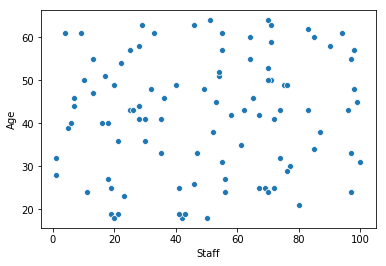

In [2]:
import pandas as pd  
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
 
staff = np.random.choice(101, 100) #generates an array of 100 numbers between 1 and 100
staff_ages = np.random.randint(18, 65, 100)#generates an array of 100 numbers in a range from 18 to 65
sns.scatterplot(staff,staff_ages)
plt.xlabel("Staff")
plt.ylabel("Age")

In order to describe the shape of the distribution of staff ages in a clearer way, I decided to also plot this as a histogram -

Text(0,0.5,'Frequency')

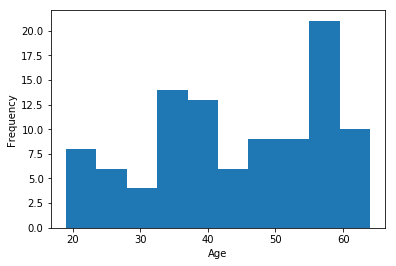

In [10]:
plt.hist(staff_ages)
plt.xlabel("Age")
plt.ylabel("Frequency")

To derive the mean age of the data set I used the [numpy.mean](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.mean.html) function - 

In [6]:
np.mean(staff_ages, dtype=np.integer)#to print mean as integer rather than float 

41

Next I decided I needed to randomly assign these 100 vaccinated staff members to 4 different departments. I figured the best way to do this was to create a Pandas Dataframe and then generate the random values within that. After some online research I found [this post on stackoverflow.com](https://stackoverflow.com/questions/3589214/generate-multiple-random-numbers-to-equal-a-value-in-python) that recommended using the multinomial distribution from the [numpy.random.multinomial function](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multinomial.html) from NumPy's Random Sampling package. 

In [3]:
department = (["Accounts", "Engineering", "Administration", "Facilities"])
#need to assign 25 variables from "staff" to the 4 departments and create a dataframe of these values
df = pd.DataFrame(np.random.multinomial(100,[4/25.]*4, size=1)) #https://stackoverflow.com/questions/3589214/generate-multiple-random-numbers-to-equal-a-value-in-python
df.columns = (["Accounts", "Engineering", "Administration", "Facilities"])
df.index = (["Total"])
print (df)

       Accounts  Engineering  Administration  Facilities
Total        16           20              12          52


To display the uptake of the vaccine, I used a barplot to chart the frequency of vaccinated staff per department. 

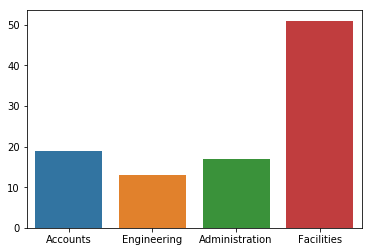

In [17]:
#vaccine uptake
sns.barplot(data=df)

In [18]:
#staff_ages vs 
